In [1]:
import numpy as np
import matplotlib.pyplot as plt
import umap

c:\Users\laura\miniconda3\envs\ml_homework\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_3d_umap_colored(embedding_3d, original_s3_points, title='UMAP Projection of S³'):
    """
    Plots a 3D scatter plot of embedded points, color-coded by the value of the 
    forth variable in the original sampled points in the 3-sphere.

    Input format:
    embedding_3d: UMAP embedding result, with format (N, 3)
    original_s3_points: sampled points in S³, with format (N, 4)
    """
    w_coord = original_s3_points[:, 3]

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    sc = ax.scatter(
        embedding_3d[:, 0],
        embedding_3d[:, 1],
        embedding_3d[:, 2],
        c=w_coord,
        cmap='coolwarm',  
        s=5,
        alpha=0.8
    )

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()
    ax.set_title(title)
    cbar = plt.colorbar(sc, shrink=0.6, aspect=10)
    cbar.set_label('Value of fourth coordinate in $S^3$')

    plt.show()

**Randomly sampling**

Gaussian sampling of $\mathbb{R}^n$ and normalizing so that each resulting point is in the 
3-sphere.

In [3]:
def gaussian_sample(n):
    points = np.random.normal(0, 1, (n, 4))
    norms = np.linalg.norm(points, axis=1)
    points_on_3sphere = points / norms[:, np.newaxis]
    
    return points_on_3sphere

**Deterministic sampling**

Fibonacci grid method leverages the golden ratio to place points with minimal overlap by 
"spreading them out" in angular coordinates. For the 3-sphere, we need to generalize 
spherical coordinates in a way that minimizes clustering:

In [4]:
def fibonaccigrid_sampling(n):
    phi = (1 + np.sqrt(5)) / 2  
    points = np.zeros((n, 4))
    
    for k in range(n):
        #Compute angles using the index k and n points
        theta = np.arccos(1 - 2 * (k + 0.5) / n)  # Range [0, π]
        phi_k = 2 * np.pi * (k / phi**2)          # Range [0, 2π], scaled by golden ratio squared
        psi_k = 2 * np.pi * (k / phi**3)          # Additional rotation for 3rd angle, golden ratio cubed
        
        #Convert spherical coordinates to cartesian coordinates
        points[k, 0] = np.cos(theta)
        points[k, 1] = np.sin(theta) * np.cos(phi_k)
        points[k, 2] = np.sin(theta) * np.sin(phi_k) * np.cos(psi_k)
        points[k, 3] = np.sin(theta) * np.sin(phi_k) * np.sin(psi_k)
    
    return points

Using the golden ratio as the basis for angle increments helps avoid overlaps and clustering, creating a quasi-uniform distribution that approximates equal spacing.

**Dimensionality reduction with UMAP**

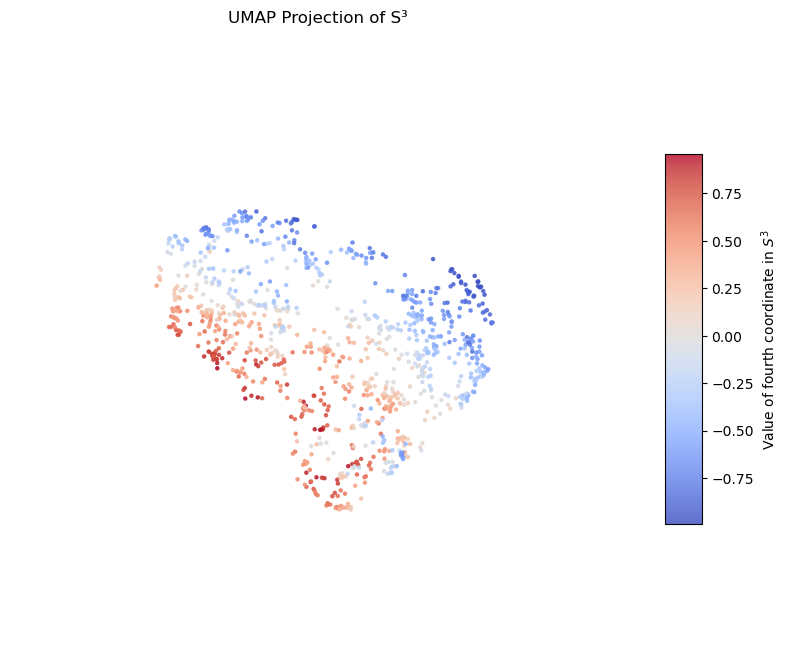

In [46]:
n = 1000
randomly_sampled_points = gaussian_sample(n)

embedding1 = umap.UMAP(
    n_components = 3, n_neighbors=50, learning_rate=0.5, init="random", min_dist=0.001
).fit_transform(randomly_sampled_points.data)

plot_3d_umap_colored(embedding1, randomly_sampled_points)


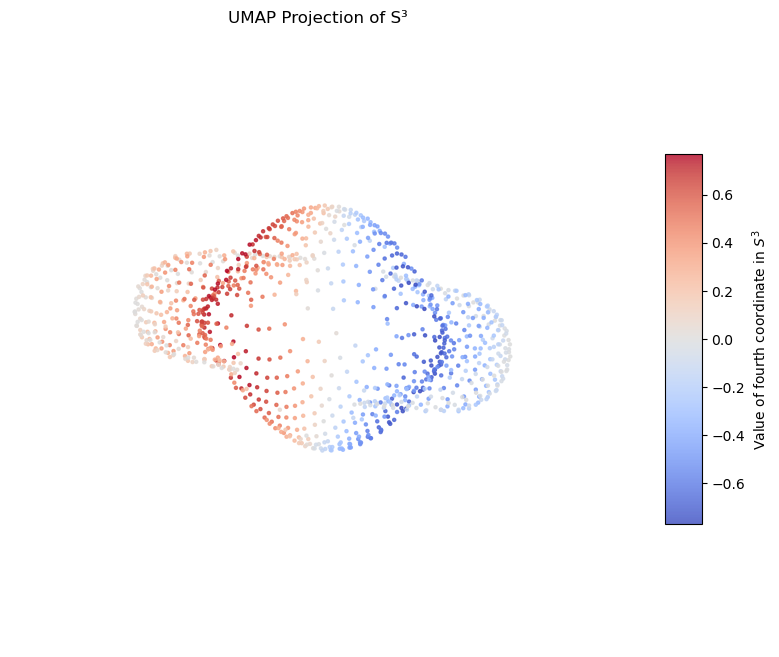

In [45]:
n_points = 1000
fibonaccigrid_sampled_points = fibonaccigrid_sampling(n_points)

embedding2 = umap.UMAP(
    n_components = 3, n_neighbors=50, learning_rate=0.5, init="random", min_dist=0.001
).fit_transform(fibonaccigrid_sampled_points.data)

plot_3d_umap_colored(embedding2, fibonaccigrid_sampled_points)

Sticking to the fibonacci grid for point sampling, let us now vary some key parameters of the umap method for dimension reduction.
This two hyperparameters are the number of neighbours "n_neighbours" and the "min_dist".

The number of neighbours determines wether we are interested in the local or global properties of the manifold. On one side, small values ensure that
the detailed manifold structure is shown and larger values will capture large scale manifold structures. Trade off between details and large scale features.

The minimal distance is a parameter that affects the output, controlling the appearance. Small values result in densely packed regions, that accurately represent the manifold but are difficult to understand to the eye. Large values will force the embedding to spread out the points more, but we loose accuracy.

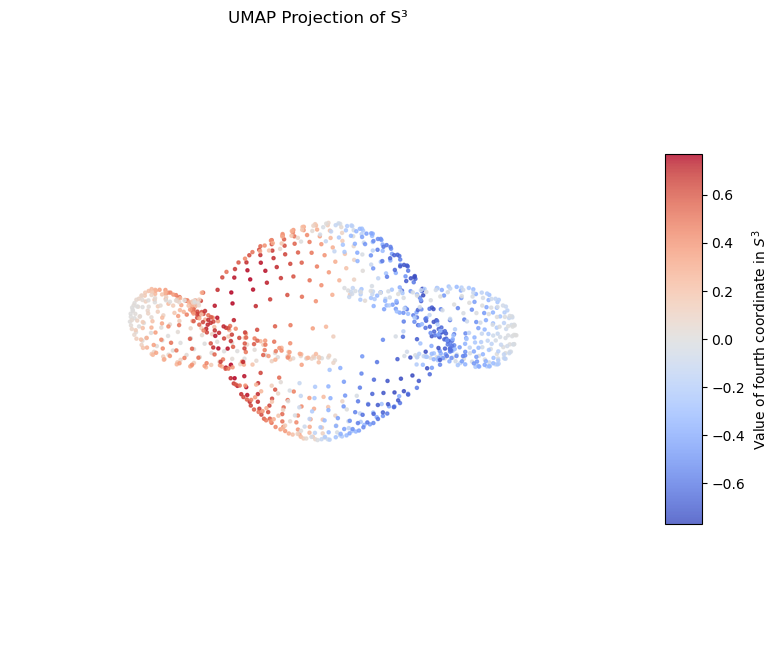

In [35]:
embedding3 = umap.UMAP(
    n_components = 3, n_neighbors=20, learning_rate=0.5, init="random", min_dist=0.001
).fit_transform(fibonaccigrid_sampled_points.data)

plot_3d_umap_colored(embedding3, fibonaccigrid_sampled_points)

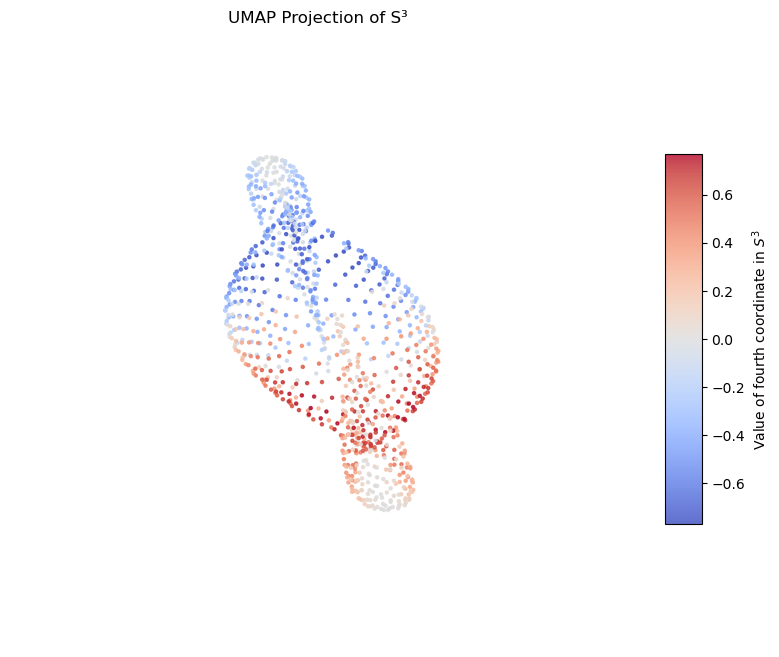

In [44]:
embedding4 = umap.UMAP(
    n_components = 3, n_neighbors=20, learning_rate=0.5, init="random", min_dist=0.1
).fit_transform(fibonaccigrid_sampled_points.data)

plot_3d_umap_colored(embedding4, fibonaccigrid_sampled_points)

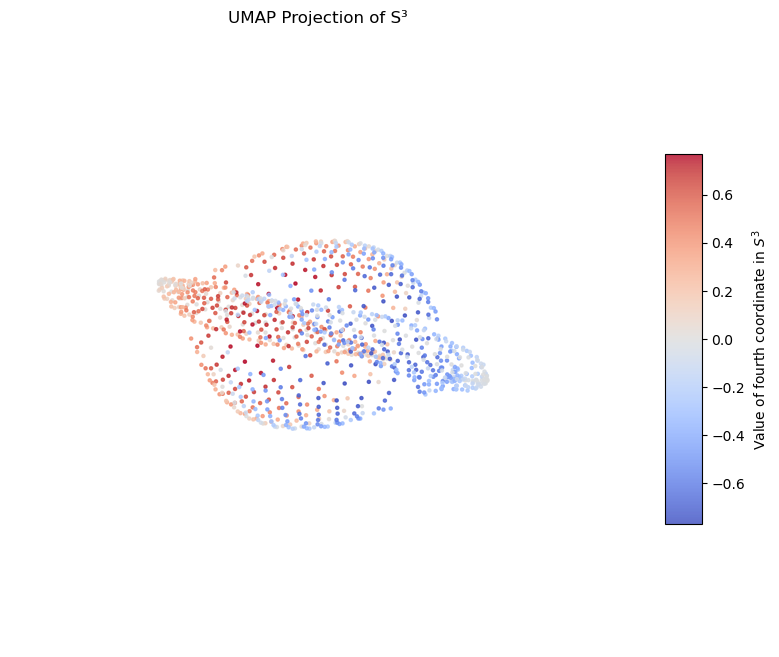

In [42]:
embedding5 = umap.UMAP(
    n_components = 3, n_neighbors=100, learning_rate=0.5, init="random", min_dist=0.001
).fit_transform(fibonaccigrid_sampled_points.data)

plot_3d_umap_colored(embedding5, fibonaccigrid_sampled_points)

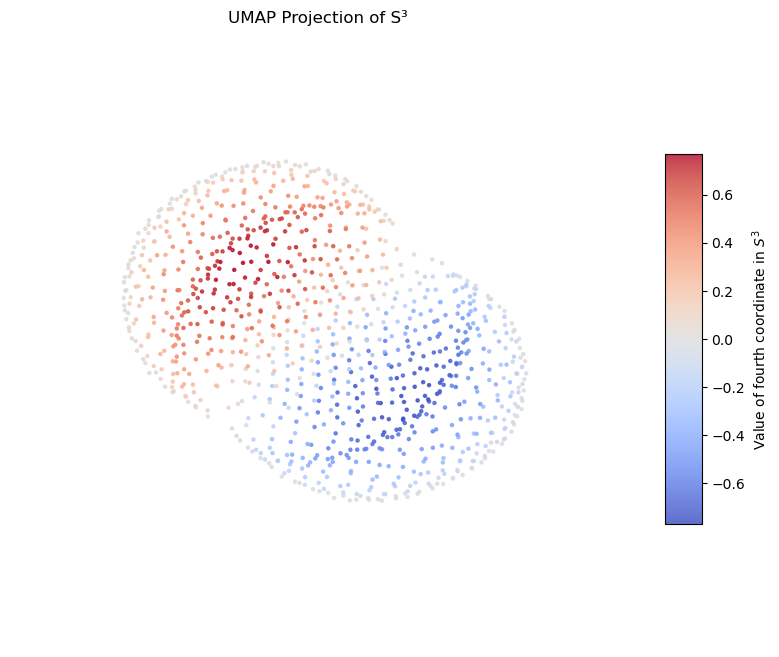

In [17]:
#large n_neighbors, large min_dist
embedding6 = umap.UMAP(
    n_components = 3, n_neighbors=100, learning_rate=0.5, init="random", min_dist=0.1
).fit_transform(fibonaccigrid_sampled_points.data)

plot_3d_umap_colored(embedding6, fibonaccigrid_sampled_points)